In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
%matplotlib inline 

from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import t




(array([10138.,  9983., 10209.,  9850.,  9834., 10043.,  9993.,  9960.,
         9923., 10067.]),
 array([  1.00103694,  11.00083609,  21.00063524,  31.00043439,
         41.00023354,  51.00003269,  60.99983184,  70.99963099,
         80.99943014,  90.99922929, 100.99902845]),
 <BarContainer object of 10 artists>)

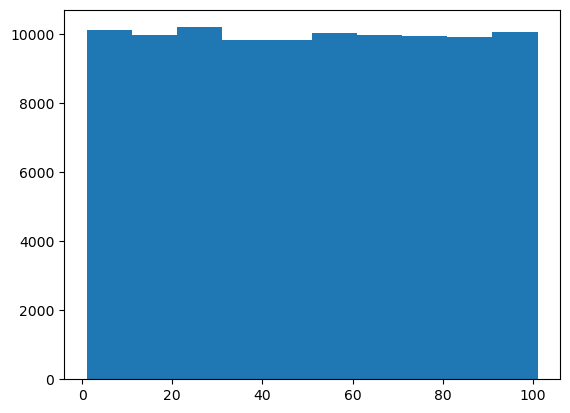

In [2]:
np.random.seed(1)
uniformrvs=uniform.rvs(1,100,size=100000)
plt.hist(uniformrvs)



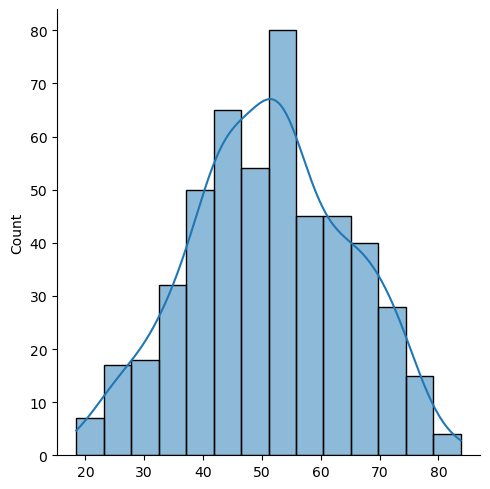

In [3]:
np.random.seed(1)
n=5
sample_mean=[]
for j in range(500):
    sample=np.random.choice(uniformrvs,size=n)
    sample_mean.append(np.mean(sample))

sns.displot(sample_mean,kde=True)
    


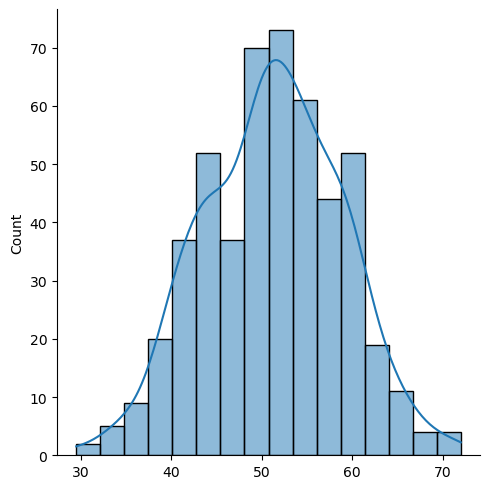

In [4]:
np.random.seed(1)
n=15
sample_mean=[]
for j in range(500):
    sample=np.random.choice(uniformrvs,size=n)
    sample_mean.append(np.mean(sample))

sns.displot(sample_mean,kde=True)

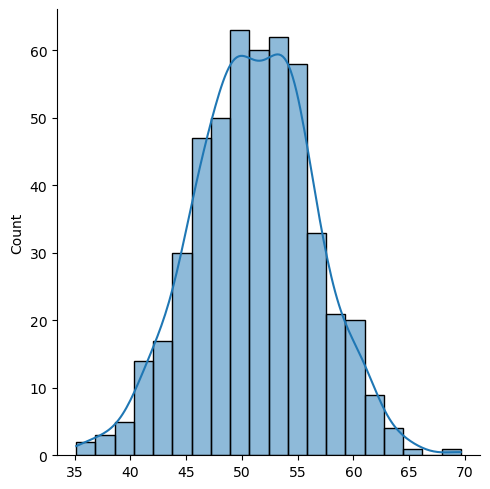

In [5]:
np.random.seed(1)
n=30
sample_mean=[]
for j in range(500):
    sample=np.random.choice(uniformrvs,size=n)
    sample_mean.append(np.mean(sample))

sns.displot(sample_mean,kde=True)

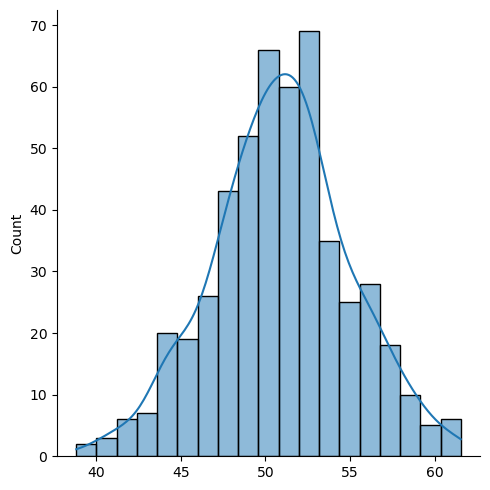

In [6]:
np.random.seed(1)
n=50
sample_mean=[]
for j in range(500):
    sample=np.random.choice(uniformrvs,size=n)
    sample_mean.append(np.mean(sample))

sns.displot(sample_mean,kde=True)

Let's see how population mean is estimated by the sample mean

A non-profit organization sampled the files of the local forest department to come up with the following amounts (in thousands of dollars) of damages for 10 wildfire incidents:

120, 55, 60, 10, 8, 150, 44, 58, 62, 123

What is the estimate of the average amount of damage in wildfires, in that area?


In [7]:
array=np.array([120, 55, 60, 10, 8, 150, 44, 58, 62, 123])
array

array([120,  55,  60,  10,   8, 150,  44,  58,  62, 123])

In [8]:
mean=np.mean(array)
mean

69.0

# <a name='link3'>**Confidence Interval**</a>

#### **Let's see how confidence interval is constructed for the population mean when std dev is known**

It is rarely the case when you know the population standard deviation and not the mean. However, it may not be as unlikely an assumption as it seems. For a tight manufacturing process which is in place for a long time, the variability in the process may be controlled, but with small changes in temperature or humidity, the mean may change.


Let's construct the confidence interval for an example where the population mean is unknown and the standard deviation is known.



The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee dispensed by a new coffee machine. The mean of the sample is found to be 110 mg. It is known that the standard deviation from all the machines of that manufacturer is 7 mg. Construct a 95% confidence interval for μ, the mean caffeine content for cups dispensed by the machine.


In [9]:
x_bar=110
sigma=7
n=50
np.round(norm.interval(0.95,loc=x_bar,scale=sigma/np.sqrt(n)),2)

array([108.06, 111.94])

A random sample of 100 men is taken and their mean height is calculated to be 180 cm. The population variance is 36 cm2. Find the 95% confidence interval for the mean height of the population.

In [10]:
n=100
x_bar=180
sigma=np.sqrt(36)
sigma

np.round(norm.interval(0.95,loc=x_bar,scale=sigma/np.sqrt(n)),3)

array([178.824, 181.176])

A landlord wants to rent an unfurnished one-bedroom apartment in Chicago. The mean monthly rent calculated from a random sample of 100 apartments in Chicago advertised on a website is $1000. Assume a population standard deviation of $200. Construct a 95% confidence interval for the mean rent.

In [11]:
n=100
x_bar=1000
sigma=200
np.round(norm.interval(0.95,loc=x_bar,scale=sigma/np.sqrt(n)),1)

array([ 960.8, 1039.2])



A survey of females aged 16-60 years was conducted by the Department of Population Censuses (DPC) and it was found that a sample of 50 female students has a mean height of 160.9 cm with a standard deviation of 6 cm.

Determine the confidence interval of height with a confidence level of 90%.


In [12]:
n=50
x_bar=160.9
sigma=6

#np.round(norm.interval(0.90,loc=x_bar,scale=sigma/np.sqrt(n)),2)

np.round(t.interval(0.90, df = n-1, loc = x_bar,scale = 6/np.sqrt(n)), 2)

array([159.48, 162.32])

If standard daviation of Population not known we need to go for T distribution which is more or less normal distribtuion only 


In [13]:
x_bar=110
sigma=7
n=50
#df is degree of freedom which is one less than the sample space
np.round(t.interval(0.95,df=n-1,loc=x_bar,scale=sigma/np.sqrt(n)),2)

array([108.01, 111.99])

### Hypothesis testing

*   Samples are drawn from a normal distribution - Since the sample size is 45(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply z test on if we knew that the population distribution was normal.  
*   Observations are from a simple random sample - we are informed that the manager collected a simple random sample
*   Standard deviation is known - Yes

In [14]:
mu=5
sigma=1.3
x_bar=5.25
n=45

z_test_stat=(x_bar-mu)/(sigma/np.sqrt(n))
z_test_stat

1.2900392177883402

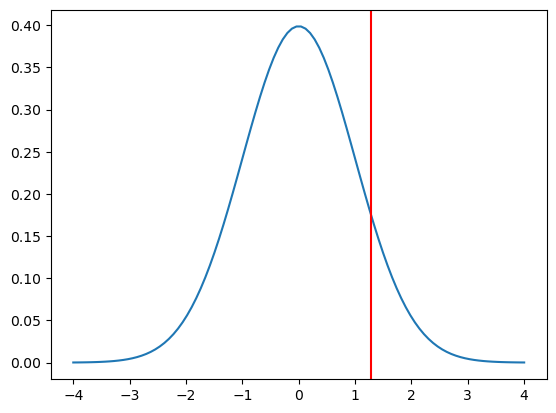

In [15]:
x=np.linspace(-4,4,100)
plt.plot(x,norm.pdf(x,0,1))
plt.axvline(x=z_test_stat,c="r")
plt.show()


What is the probability of getting the calculated value of test statistic or bigger in the above distribution?

In [16]:
1-norm.cdf(z_test_stat)

0.09851852092578695

In [17]:
critical_val=norm.ppf(1-.05)
critical_val

1.6448536269514722

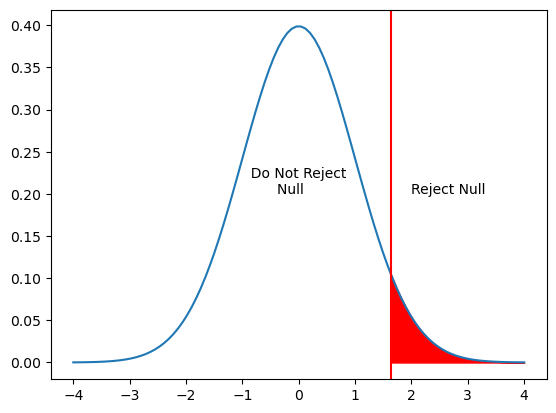

In [18]:
# plotting the test statistic distribution and indicating the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(critical_val, 4, 50) # create an array of 50 numbers starting from the critical value and ending at 4
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
plt.annotate('Reject Null', (2, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.show() # display the plot

### Insight

As the p-value ~0.098 is greater than level of significance, we can not reject the null hypothesis. Thus, we do not have statistical evidence to say that the mean delivery time of a product is greater than 5 days.

The baggage limit for an airline is set at 50 kg per person. The weight of the baggage
of an individual passenger follows a normal distribution with a mean of 45 kg and a
standard deviation of 17 kgs. What is the probability that a randomly chosen
passenger’s baggage will be over the limit?


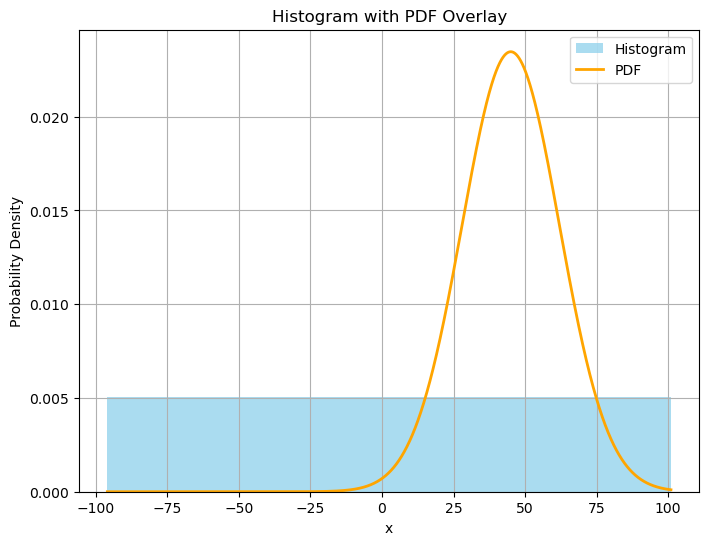

0.38433400328040435

In [19]:
mu=45
sigma=17
limit=50
x=np.linspace(-45-51,50+51,100000)
x
# prob1=1-norm.cdf(x,45,17)
# prob1
plt.figure(figsize=(8, 6))
plt.hist(x, bins=100, density=True, color='skyblue', alpha=0.7, label='Histogram')  # Adjust bins as needed

pdf = norm.pdf(x, mu, sigma)

# Plotting the PDF curve
plt.plot(x, pdf, color='orange', linewidth=2, label='PDF')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Histogram with PDF Overlay')
plt.legend()
plt.grid(True)
plt.show()
probability_under_limit = norm.cdf(limit, mu, sigma)
probability_over_limit=1 - probability_under_limit
probability_over_limit
# plt.hist(x,norm.pdf(x,mu,sigma))
# plt.show()

# zscore=(50-45)/17
# zscore
# prob=1-norm.cdf(zscore)
# prob


The baggage limit for an airline is set at 50 kg per person. The weight of the baggage
of an individual passenger follows a normal distribution with a mean of 45 kg and a
standard deviation of 17 kgs. What is the probability that a randomly chosen
passenger’s baggage will be over the limit?



When in a hurry, the airline does not weigh each passenger’s baggage, but check
whether average baggage weight of 100 passengers is within the limit. What is the
probability that average baggage weight of 100 passengers will be over the limit?

In [20]:
n=100
limit=50
mu=45
sigma=17

p=1-norm.cdf(50,mu,sigma)
p
pstat=1-stats.norm(mu,sigma).cdf(limit)
pstat

0.38433400328040435

In [21]:
samplesigma=sigma/np.sqrt(n)
samplesigma
probability_over_limit_100 = 1 - stats.norm(mu, samplesigma).cdf(limit)
probability_over_limit_100

0.00163484100634681

The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee
dispensed by a new machine. The mean of the sample is found to be 110 mg. It is known that
the standard deviation from all the machines of that manufacturer is 7 mg. Construct a 95%
confidence interval for μ, the mean caffeine content for cups dispensed by the machine.

In [22]:
n=50
sample_mu=110
sigma=7


norm.interval(0.95,loc=sample_mu,scale=sigma/np.sqrt(n))


(108.05973464591045, 111.94026535408955)

In [23]:
110+(1.96*(sigma/np.sqrt(n)))

111.94030100757588

In [24]:
110-(1.96*(sigma/np.sqrt(n)))

108.05969899242412

The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee
dispensed by a new machine. The mean of the sample is found to be 110 mg and the sample
standard deviation is estimated to be 7 mg. Construct a 95% confidence interval for μ, the mean
caffeine content for cups dispensed by the machine.

In [25]:
n=50
samplemu=110
samplesigma=7

t.interval(0.95,df=n-1,loc=samplemu,scale=samplesigma/(np.sqrt(n)))

(108.0106220141434, 111.9893779858566)

The Environmental Protection Agency releases figures on SPM in urban localities.
For New Delhi the average figure for the past year was 528.8 g/m3
. After the odd-even rotation
policy with private automobiles was implemented the Government claims that the amount of
SPM has reduced significantly in New Delhi.

mu=526.8

H0=526.8

ha<526.8

A certain food aggregator ZYX is facing stiff competition from its main rival SWG
during Corona period. To retain business, ZYX is advertising that, within a radius of 5 km from
the restaurant where the order is placed, it can deliver in 40 minutes or less on the average. The
delivery times in minutes of 30 deliveries are given in the file fastfood.csv. Assuming the
delivery distribution is approximately normal, is there enough evidence that ZYX’s claim is
true? 

In [26]:
df=pd.read_csv("FastFood.csv")
df.head()

,Delivery,Time
0,1,39.4
1,2,39.5
2,3,39.7
3,4,40.7
4,5,40.4


Ho mu<=40
Ha mu>40

In [46]:
n=30
mu=40
samplemu=df['Time'].mean()
samplemu=round(samplemu,3)
samplemu

42.3

In [47]:
samplesigma=df['Time'].std()
samplesigma=round(samplesigma,3)
samplesigma

2.257

In [55]:
ttest=(samplemu-mu)/(samplesigma/np.sqrt(n))
round(ttest,3)

5.582

In [59]:
# pvalue=1-norm.cdf(ttest)
# pvalue

p_value = 1-stats.t.cdf(ttest, n-1)
p_value

2.523744994653576e-06

In [40]:
alpha=0.05

if pvalue<alpha:
    print("We reject null hypothesis")
else:
    print("We fail to reject null hypothesis")

We reject null hypothesis


In [41]:
t_statistics, p_value1 = stats.ttest_1samp(df['Time'], popmean=40,alternative="greater")
t_statistics
p_value1
#p_value1=p_value1/2

2.5280470201361403e-06

In [46]:
print("t_statistic= {} and pvalue= {}".format(round(t_statistics,3),round(p_value1,7)))

t_statistic= 5.581 and pvalue= 2.5e-06


In [52]:
Diamonds=pd.read_csv("Diamonds.csv")
Diamonds.head()

,Price
0,4620
1,6210
2,5150
3,5250
4,4840


In [53]:
Diamonds.describe()

,Price
count,25.00000
mean,5835.00000
std,520.11417
min,4620.00000
25%,5620.00000
50%,5940.00000
75%,6140.00000
max,6850.00000


In [54]:
Diamonds.shape

(25, 1)

In [57]:
t.interval(0.95,loc=5835,df=24,scale=5835/(520.11/np.sqrt(25)))

(5719.227873843038, 5950.772126156962)